In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
dataset = pd.read_csv("SocialNetworkAds.csv","\t")
dataset

,User Id,Gender,Age,EstimatedSalary,Purchased
0,12343,Male,19,19000,0
1,12344,Male,35,20000,0
2,12345,Female,26,43000,0
3,12346,Female,27,76000,0
4,12347,Male,19,150000,1
5,12348,Female,27,33000,0
6,12349,Male,32,65000,0


In [24]:
dataset.head

<bound method NDFrame.head of    User Id  Gender  Age  EstimatedSalary  Purchased
0    12343    Male   19            19000          0
1    12344    Male   35            20000          0
2    12345  Female   26            43000          0
3    12346  Female   27            76000          0
4    12347    Male   19           150000          1
5    12348  Female   27            33000          0
6    12349    Male   32            65000          0>

In [8]:
dataset.describe

<bound method NDFrame.describe of    User Id  Gender  Age  EstimatedSalary  Purchased
0    12343    Male   19            19000          0
1    12344    Male   35            20000          0
2    12345  Female   26            43000          0
3    12346  Female   27            76000          0
4    12347    Male   19           150000          1
5    12348  Female   27            33000          0
6    12349    Male   32            65000          0>

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
User Id            7 non-null int64
Gender             7 non-null object
Age                7 non-null int64
EstimatedSalary    7 non-null int64
Purchased          7 non-null int64
dtypes: int64(4), object(1)
memory usage: 408.0+ bytes


In [11]:
x= dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [12]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  76000],
       [    19, 150000],
       [    27,  33000],
       [    32,  65000]])

In [13]:
y

array([0, 0, 0, 0, 1, 0, 0])

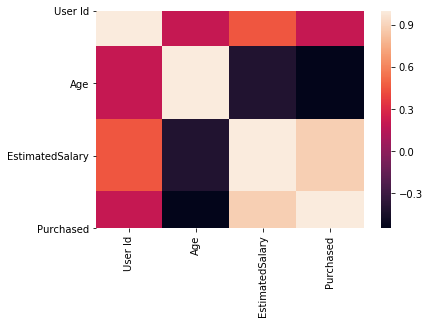

In [14]:
sns.heatmap(dataset.corr())

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

/home/ritesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0])

TypeError: 'tuple' object is not callable

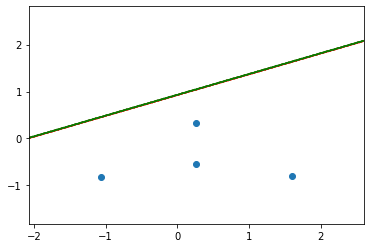

In [19]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max() + 1, step = 0.01), np.arange(start = x_set[:,1].min()-1,stop = x_set[:, 1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha= 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j ,1])
    c= ListedColormap(('red','green')(i), label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

TypeError: 'tuple' object is not callable

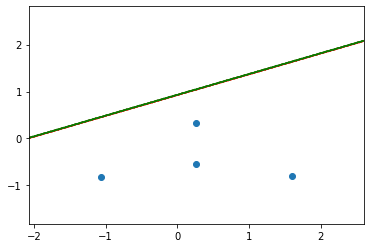

In [20]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max() + 1, step = 0.01), np.arange(start = x_set[:,1].min()-1,stop = x_set[:, 1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha= 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j ,1])
    c= ListedColormap(('red','green')(i), label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2]])